In [2]:
from packaging import version

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
import os

import scienceplots
mpl.rc_file_defaults()
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams["legend.edgecolor"] = 'black'
plt.rc('legend', fontsize=10)



def cleanData(data):
    # Multiply z to be positive upwards
    data.loc[:, "z"] *= -1
    # Convert angles to degrees
    data.loc[:, ["phi", "theta", "psi"]] *= 180 / np.pi
    return data

Plotting Data


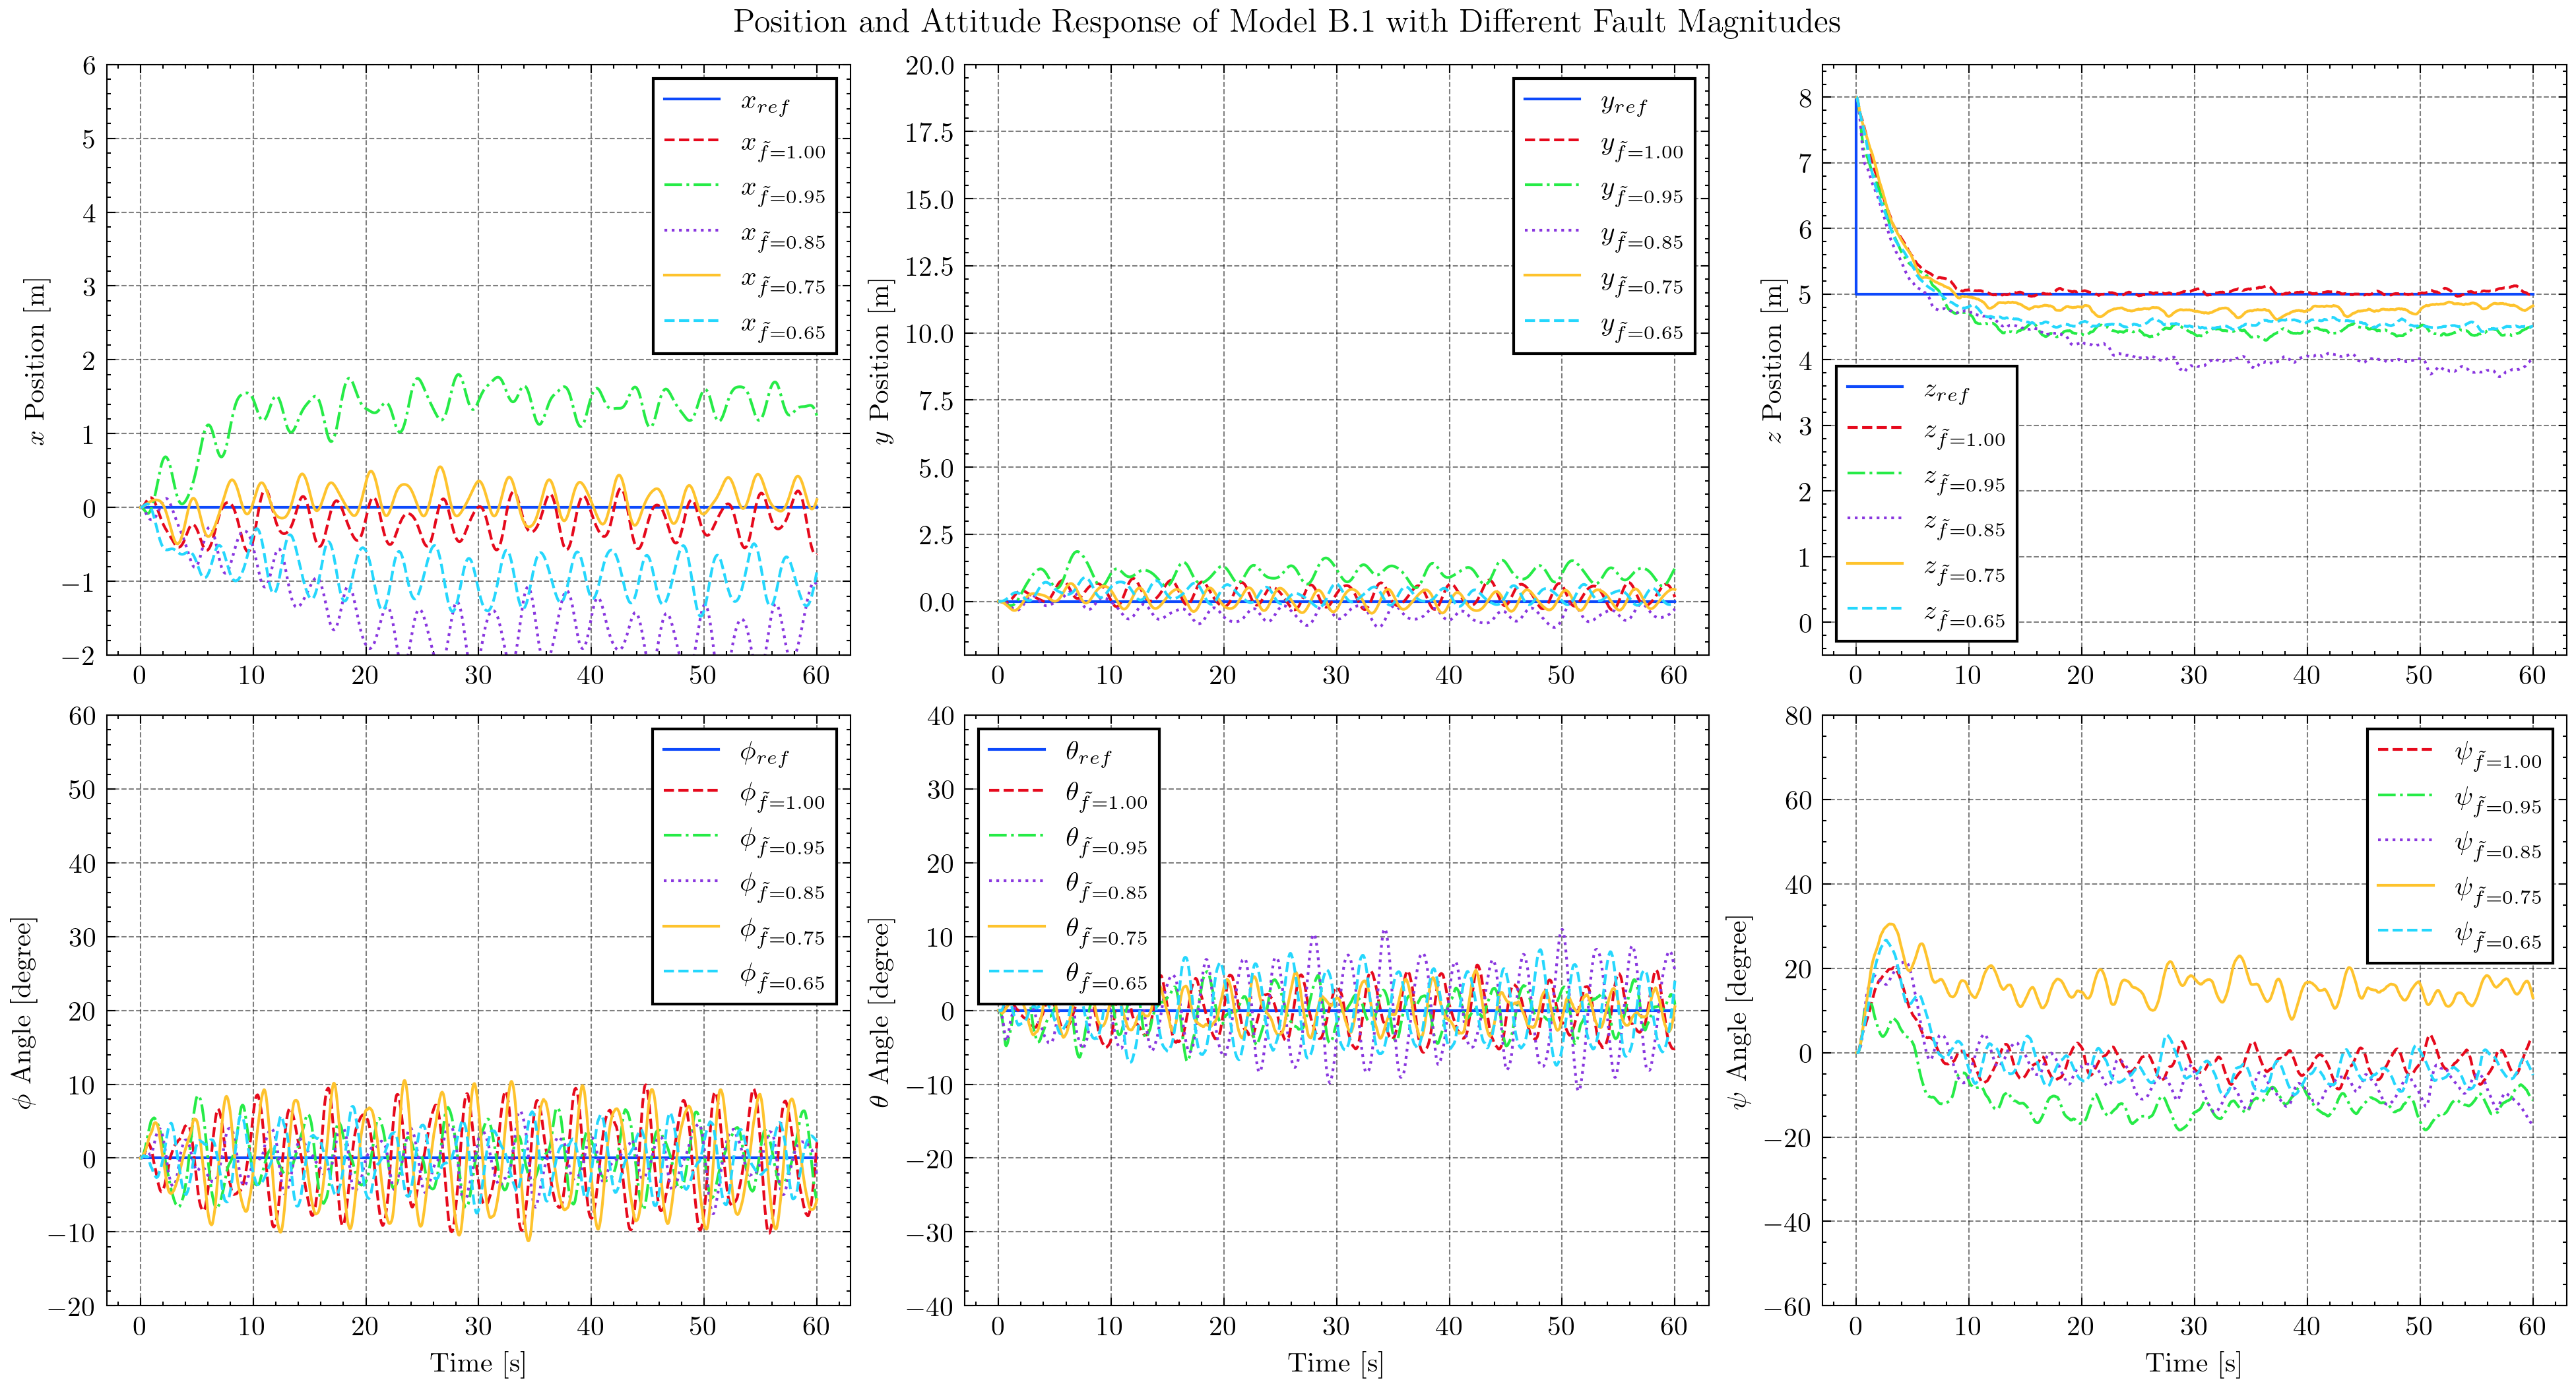

Closing Plots


In [6]:

B3_C1_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case1.csv")
B3_C2_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case2.csv")
B3_C3_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case3.csv")
B3_C4_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case4.csv")
B3_C5_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case5.csv")



B3_C1_data = cleanData(B3_C1_data)
B3_C2_data = cleanData(B3_C2_data)
B3_C3_data = cleanData(B3_C3_data)
B3_C4_data = cleanData(B3_C4_data)
B3_C5_data = cleanData(B3_C5_data)



datas = [
    B3_C1_data,
    B3_C2_data,
    B3_C3_data,
    B3_C4_data,
    B3_C5_data,
]

ftildes = ["1.00", "0.95", "0.85", "0.75", "0.65"]

symbols = [
    "x",
    "y",
    "z",
    "\phi",
    "\\theta",
    "\psi",
]

ylims = [
    [-2, 6],
    [-2, 20],
    [-0.5, 8.5],
    [-20, 60],
    [-40, 40],
    [-60, 80],
]
ylabels = [
    f"${symbols[0]}$ Position [m]",
    f"${symbols[1]}$ Position [m]",
    f"${symbols[2]}$ Position [m]",
    f"${symbols[3]}$ Angle [degree]",
    f"${symbols[4]}$ Angle [degree]",
    f"${symbols[5]}$ Angle [degree]",
]

reference_signals = [
    [[0, 60], [0, 0]],
    [[0, 60], [0, 0]],
    [[0, 0, 60], [8, 5, 5]],
    [[0, 60], [0, 0]],
    [[0, 60], [0, 0]],
    [],
]

plt.style.use(['science', 'grid', 'high-vis'])

rows = 2
cols = 3

fig, ax = plt.subplots(rows, cols, figsize=(13, 7), sharex='row', layout="constrained")

i = 0

print("Plotting Data")
for row in range(rows):
    for col in range(cols):
        if i in [0, 1, 2, 3, 4]:
            ax[row, col].plot(reference_signals[i][0], reference_signals[i][1],
                              label="$" + symbols[i] + "_{ref}$")
        else:
            next(ax[row, col]._get_lines.prop_cycler)


        for data_i, data in enumerate(datas):
            line = ax[row, col].plot(data.iloc[:, 1], data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{\\tilde{f}="+ ftildes[data_i] +"}$")

            if data_i < 0:
                final_point = data.iloc[-1, [1, i + 2]]
                ax[row, col].plot(final_point[0], final_point[1], 'x', color=line[0].get_color())



        ax[row, col].set_xlabel("Time [s]", fontsize=10) if row == 1 else None
        ax[row, col].set_ylabel(ylabels[i], fontsize=10)
        ax[row, col].set_ylim(ylims[i])
        ax[row, col].tick_params(axis='both', which='major', labelsize=10)
        ax[row, col].legend(fontsize=10, fancybox=False, edgecolor='black')

        i += 1

text = "All models with $\\tilde{f} \le 0.50$," \
       "\n fail within 5 seconds."
bbox = dict(facecolor='white', edgecolor='black', alpha=0.8)
#fig.text(0.76, 0.66, text, fontsize=10, bbox=bbox, transform=fig.transFigure)



plt.suptitle("Position and Attitude Response of Model B.1 with Different Fault Magnitudes")

# plt.savefig(f'images/differentMotorFaults.png', dpi=300)
plt.show()

print("Closing Plots")
plt.close(fig)


In [ ]:
B3_C5_data
